In [41]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
df =pd.read_csv('emoji_usage_dataset.csv')

In [4]:
df1 =df.copy()

In [5]:
df1.head()

,Emoji,Context,Platform,User Age,User Gender
0,😎,angry,Snapchat,47,Male
1,👍,love,Instagram,36,Male
2,😳,angry,Snapchat,51,Male
3,😂,confusion,Facebook,64,Male
4,🤣,celebration,Snapchat,56,Female


In [6]:
df1.tail()

,Emoji,Context,Platform,User Age,User Gender
4995,🤪,love,Snapchat,33,Male
4996,🙌,celebration,WhatsApp,55,Male
4997,😂,celebration,TikTok,63,Male
4998,😘,support,Snapchat,15,Female
4999,👏,happy,TikTok,55,Female


In [7]:
df1.describe()

,User Age
count,5000.000000
mean,38.875600
std,15.193179
min,13.000000
25%,26.000000
50%,39.000000
75%,52.000000
max,64.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Emoji        5000 non-null   object
 1   Context      5000 non-null   object
 2   Platform     5000 non-null   object
 3   User Age     5000 non-null   int64 
 4   User Gender  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [9]:
df1.columns

Index(['Emoji', 'Context', 'Platform', 'User Age', 'User Gender'], dtype='object')

In [11]:
df1.shape

(5000, 5)

<Axes: ylabel='Context'>

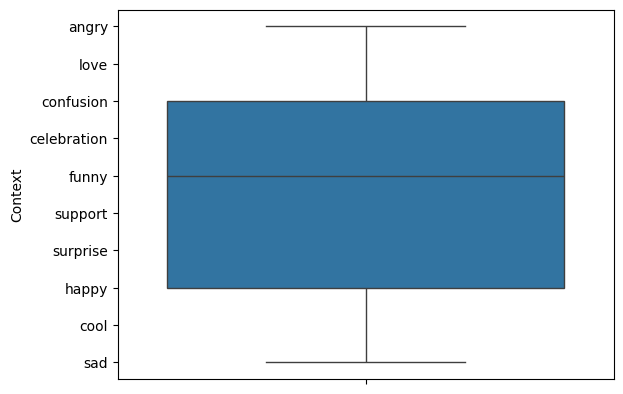

In [16]:
import seaborn as sns
sns.boxplot(df1['Context'])


<Axes: ylabel='Platform'>

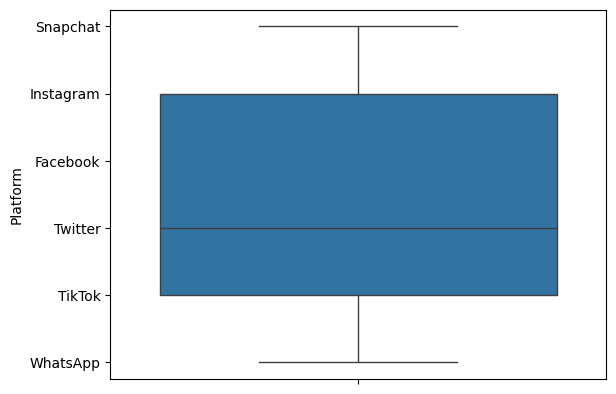

In [17]:
sns.boxplot(df1['Platform'])


<Axes: ylabel='User Gender'>

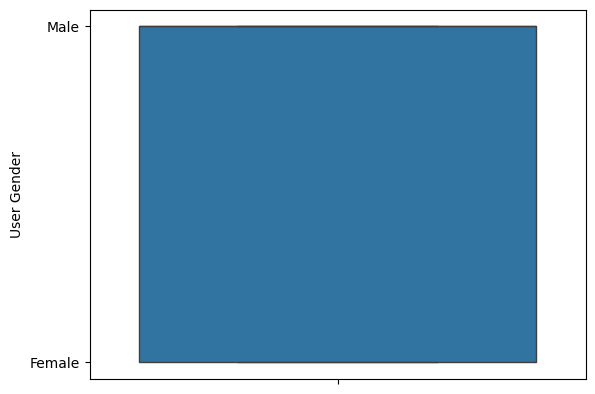

In [19]:
sns.boxplot(df1['User Gender'])


<Axes: ylabel='Emoji'>

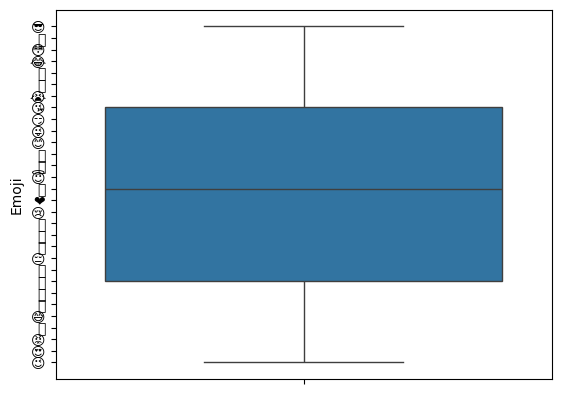

In [42]:
sns.boxplot(df1['Emoji'])

In [28]:
df1.apply(lambda x : len(x.unique()))

Emoji          30
Context        10
Platform        6
User Age       52
User Gender     2
dtype: int64

In [29]:
df1.isna().sum()

Emoji          0
Context        0
Platform       0
User Age       0
User Gender    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [31]:
# Descriptive statistics for User Age
age_stats = df1['User Age'].describe()
age_stats

count    5000.000000
mean       38.875600
std        15.193179
min        13.000000
25%        26.000000
50%        39.000000
75%        52.000000
max        64.000000
Name: User Age, dtype: float64

In [37]:
# To analyze how emojis are distributed across different contexts and platforms.
# Emoji Context Distribution:

# Frequency Count: Count the number of occurrences of each emoji in different contexts.
# Visualization: Create bar charts or pie charts to show the distribution of emojis by context.

context_distribution = df1['Context'].value_counts()
context_distribution


Context
love           538
confusion      537
cool           532
celebration    508
funny          496
angry          493
sad            490
support        478
surprise       464
happy          464
Name: count, dtype: int64

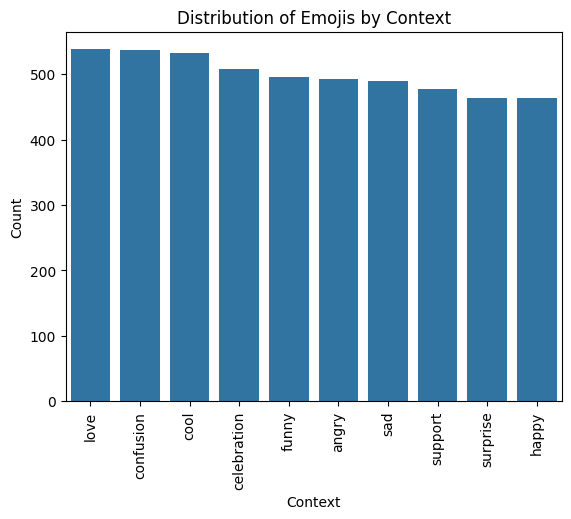

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=context_distribution.index, y=context_distribution.values)
plt.title('Distribution of Emojis by Context')
plt.xlabel('Context')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

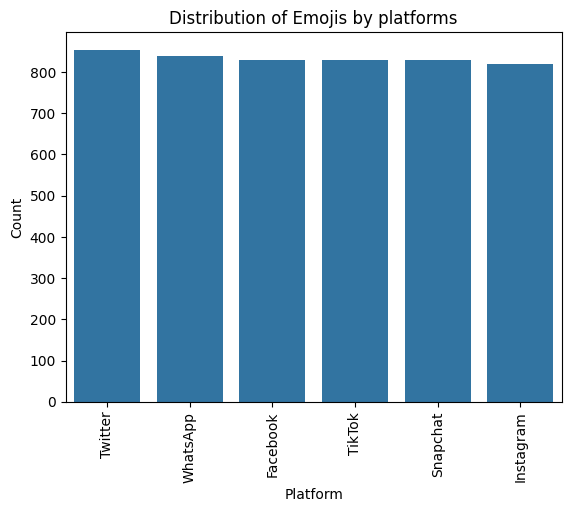

In [43]:
# Emoji Platform Distribution:

# Frequency Count: Count the number of occurrences of each emoji across different platforms.
# Visualization: Use bar charts, stacked bar charts, or heatmaps to display how emoji usage varies across platforms.
platform_counts = df1['Platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Distribution of Emojis by platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

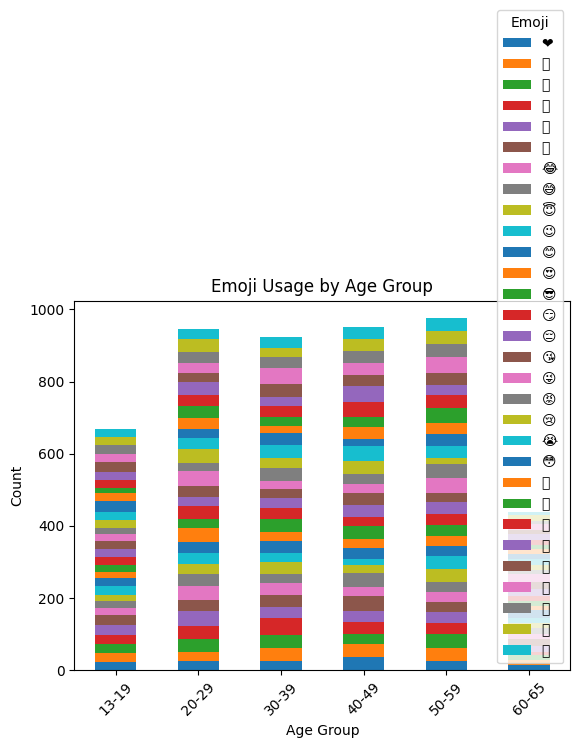

In [45]:
# To explore how emoji usage varies by user age and gender.
# Group by Age: Analyze emoji usage patterns within different age groups.
# Visualization: Use histograms or box plots to show the distribution of emoji usage by age.
# Age-based analysis of emoji usage
age_groups = pd.cut(df['User Age'], bins=[13, 20, 30, 40, 50, 60, 65], 
                    labels=['13-19', '20-29', '30-39', '40-49', '50-59', '60-65'])
age_emoji_distribution = df.groupby(age_groups)['Emoji'].value_counts().unstack().fillna(0)
age_emoji_distribution.plot(kind='bar', stacked=True)
plt.title('Emoji Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Emoji')
plt.show()


In [ ]:
# Gender-based analysis of emoji usage
gender_emoji_distribution = df.groupby('User Gender')['Emoji'].value_counts().unstack().fillna(0)
gender_emoji_distribution.plot(kind='bar', stacked=True)
plt.title('Emoji Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Emoji')
plt.show()